In [17]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from nmf import *

In [18]:
audio_file = '../data/sounds_mixedX.wav'
y, sr = librosa.load(audio_file)

In [19]:
D = librosa.stft(y)
magnitude = np.abs(D)
magnitude_db = librosa.amplitude_to_db(magnitude, ref=np.max)
print(magnitude_db)

[[-80.       -76.166725 -68.117676 ... -67.41107  -52.141293 -51.273243]
 [-80.       -74.49762  -76.79349  ... -48.90861  -48.36339  -55.60383 ]
 [-80.       -71.33743  -65.47412  ... -41.08111  -45.792778 -55.250084]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -78.25949 ]
 [-80.       -80.       -80.       ... -80.       -80.       -78.27994 ]
 [-80.       -80.       -80.       ... -80.       -80.       -78.28447 ]]


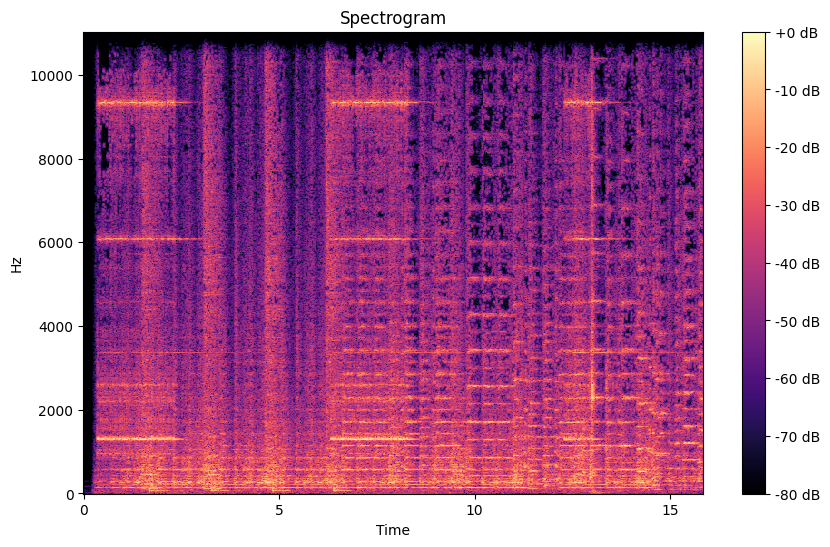

In [20]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(magnitude_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [54]:
from sklearn.decomposition import NMF
magnitude = np.abs(D)
model = NMF(n_components=300, init='nndsvd', random_state=0)
W = model.fit_transform(magnitude)
H = model.components_
print(D.shape)
# print(W)
# print()
# print(H)
# print()

print(W @ H)
print("___________________________________________________________________")
print(magnitude)

(1025, 683)
[[7.3266588e-04 5.2126031e-03 8.5528027e-03 ... 2.4153242e-01
  2.1671680e-01 2.2913446e-01]
 [1.8262423e-03 1.3673725e-02 2.1495981e-02 ... 2.8108367e-01
  1.9265825e-01 2.5588813e-01]
 [2.9338473e-03 2.1968517e-02 3.4000114e-02 ... 5.1155335e-01
  4.1791877e-01 2.9855818e-01]
 ...
 [0.0000000e+00 0.0000000e+00 2.3587252e-12 ... 7.7410275e-04
  3.9141532e-03 3.8249111e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.7226514e-04
  3.9048614e-03 3.8156393e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.7184010e-04
  3.9027124e-03 3.8136316e-03]]
___________________________________________________________________
[[2.2293054e-03 9.2847701e-03 2.3454349e-02 ... 2.5442151e-02
  1.4758521e-01 1.6309673e-01]
 [2.2801149e-03 1.1251919e-02 8.6383931e-03 ... 2.1412963e-01
  2.2800153e-01 9.9064015e-02]
 [2.3676525e-03 1.6189598e-02 3.1798128e-02 ... 5.2729309e-01
  3.0652681e-01 1.0318184e-01]
 ...
 [8.8562597e-09 4.0578683e-09 2.0695881e-08 ... 5.2444288e-06
  2.767155

c:\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


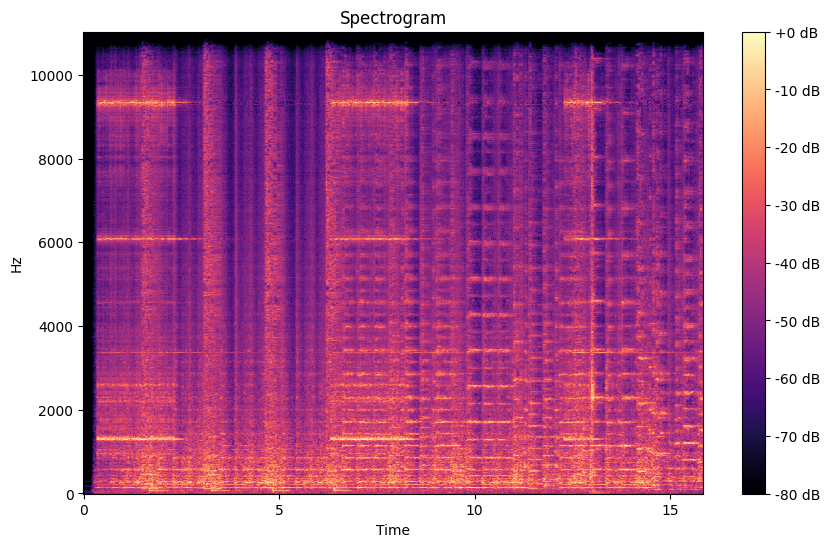

In [56]:
reconstructed_audio = np.dot(W, H)
magnitude_db = librosa.amplitude_to_db(reconstructed_audio, ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(magnitude_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [57]:
reconstructed_signal = librosa.istft(reconstructed_audio)

# Save the reconstructed audio
write('output.wav', sr, reconstructed_signal)